In [65]:
import torch 
from PIL import Image, ImageOps, ImageStat
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
try:
    from skimage.restoration import denoise_tv_chambolle
except ImportError:
    # skimage < 0.12
    from skimage.filters import denoise_tv_chambolle

In [72]:
def image_noise(path, level):
    im = ImageOps.grayscale(Image.open(path))
    im = np.array(im.resize((64, 64)))
#     img = Image.fromarray(im, 'L')
#     img.show()
    maximum = np.max(im)
    minimum = np.min(im)
    mean = np.mean(im)
    im = (im-mean)*(1/(maximum-minimum))
#     transform_norm = transforms.Compose([
#     transforms.ToTensor(), 
# #     transforms.Lambda(lambda x: torch.flatten(x))
#     transforms.Normalize(mu, std)
#         ])
#     img = np.array(transform_norm(im))
    noise = np.random.normal(0, level, im.shape)
    noisy_im = im + noise
    return im, noisy_im

a, b = image_noise('./images/eng_quad.jpeg', 0.01)

Text(0.5, 1.0, 'TV denoising')

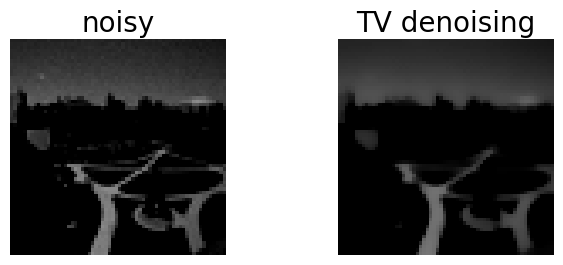

In [73]:
tv_denoised = denoise_tv_chambolle(b, weight=0.1)
plt.figure(figsize=(12, 2.8))
plt.subplot(131)
plt.imshow(b, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.axis('off')
plt.title('TV denoising', fontsize=20)

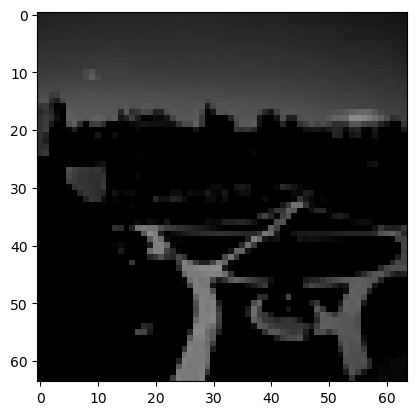

In [74]:
plt.imshow(a, cmap=plt.cm.gray, vmin=0, vmax=1)